# Cannibis Classification

This notebook will be a straightforward classification exercise with `scikit-learn` and some EDA on the [Kaggle Cannibis dataset](https://www.kaggle.com/datasets/corykjar/leafly-cannabis-strains-dataset).


# Section 0 - Preamble

We will take care of some administrative matters first

## Data Description

The data is from Kaggle, and is a static dataset with the following fields

|Field|Description|
|:---|:---|
|Name|Name of the strain|
|Type|Indica, Sativa, Hybrid|
|Alias|Other common names for the strain|
|Rating|User rating out of 5 stars|
|Num Reviews|Number of user reviews|
|THC%|% Tetrahydrocannabinol|
|Other Cannabinoids|Other cannabinoids the strain contains, most commonly CBD, CBG, THCV|
|Main_Effect|Most commonly reported effect of the strain|
|Terpenes|Most dominant terpene in the strain|

## Objective

To train a simple classification model to predict ratings for the rollout of a new product.

## Required imports and parameters

We will use standard libraries for this exercise

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from os import path
import yaml

from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier, ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_palette('nipy_spectral')
main_folder = 'cannibis'
data_raw='strains_raw.csv'
data_cleaned='strains_cleaned.csv'

# Section 1 - Exploratory Data Analysis

We will analyze the dataset and get a sense of how complete the data is, and whether we need to do any additional feature engineering. Let's load both data.

In [3]:
df_raw = pd.read_csv(path.join(main_folder,data_raw))

df_raw.head().T

,0,1,2,3,4
Title1,Ice Cream Cake,Gelato,Blue Dream,Sour Diesel,Dosidos
Title_URL1,https://www.leafly.com/strains/ice-cream-cake,https://www.leafly.com/strains/gelato,https://www.leafly.com/strains/blue-dream,https://www.leafly.com/strains/sour-diesel,https://www.leafly.com/strains/do-si-dos
inlineblock1,Indica,Hybrid,Hybrid,Sativa,Hybrid
textxs1,NaN,"aka Gelato 42, Larry Bird",NaN,"aka Sour D, Sour Deez","aka Dosi, Do-Si-Dos"
prxs1,4.6,4.6,4.3,4.3,4.6
plxs1,(1039),(2219),(14.3k),(8264),(1073)
mrmd2,THC 23%,THC 16%,THC 18%,THC 19%,THC 20%
mrm1,CBG 1%,CBD 0%,CBD 0%,CBD 0%,CBG 1%
capitalize1,Sleepy,Euphoric,Creative,Energetic,Sleepy
capitaliz1,Caryophyllene,Caryophyllene,Myrcene,Caryophyllene,Limonene


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title1        5185 non-null   object 
 1   Title_URL1    5185 non-null   object 
 2   inlineblock1  4520 non-null   object 
 3   textxs1       978 non-null    object 
 4   prxs1         4503 non-null   float64
 5   plxs1         4503 non-null   object 
 6   mrmd2         5185 non-null   object 
 7   mrm1          5185 non-null   object 
 8   capitalize1   4033 non-null   object 
 9   capitaliz1    2469 non-null   object 
 10  button_URL1   318 non-null    object 
 11  button1       318 non-null    object 
 12  Title         13 non-null     object 
 13  Title_URL     13 non-null     object 
 14  inlineblock   13 non-null     object 
 15  textxs        0 non-null      float64
 16  prxs          7 non-null      float64
 17  plxs          7 non-null      object 
 18  mrmd          13 non-null   

## 1.1 - Dropping Columns

Some columns will not be useful to us. For instance, many columns toward the end have many null values with not a lot of info. As we lack the resources and knowledge to what these are, we can drop them. 

In [5]:
cols_to_drop = ['button_URL1','button1','Title','Title_URL','Title_URL1','inlineblock','textxs','prxs','plxs','mrmd','mrmd1','capitalize','capitalize2','button_URL','button']
df_raw.drop(columns=cols_to_drop,inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5185 entries, 0 to 5184
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title1        5185 non-null   object 
 1   inlineblock1  4520 non-null   object 
 2   textxs1       978 non-null    object 
 3   prxs1         4503 non-null   float64
 4   plxs1         4503 non-null   object 
 5   mrmd2         5185 non-null   object 
 6   mrm1          5185 non-null   object 
 7   capitalize1   4033 non-null   object 
 8   capitaliz1    2469 non-null   object 
dtypes: float64(1), object(8)
memory usage: 364.7+ KB


## 1.2 - Univariate Analysis

While text data can be hard to utitlise, you can get creative with how you analyze it. For instance, we can see how long a name for a particular blend usually is.

Text(0.5, 0.98, 'Name length count')

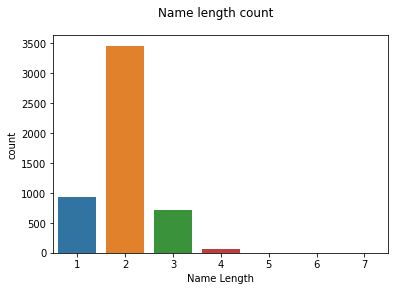

In [6]:
df_raw['Name Length']=df_raw['Title1'].str.split(" ").apply(len)
df_raw.drop(columns='Title1',inplace=True)
fig,ax=plt.subplots()
sns.countplot(x=df_raw['Name Length'],palette='tab10',ax=ax)
ax.set_xlabel('Name Length')
fig.suptitle('Name length count')

`inlineblock1` corresponds to the strain of cannibis.

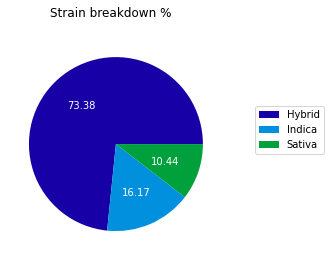

In [7]:
df_raw.rename(columns={'inlineblock1':'strain'},inplace=True)
fig,ax = plt.subplots()
patches, texts, autotexts = ax.pie(df_raw['strain'].value_counts(),autopct='%.2f')
fig.suptitle('Strain breakdown %')
[autotext.set_color('white') for autotext in autotexts]
fig.legend(df_raw['strain'].value_counts().index,loc='center right')
plt.show()

`capitalize1` corresponds to the top effect users report when smoking a particular blend.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Top Effect count')

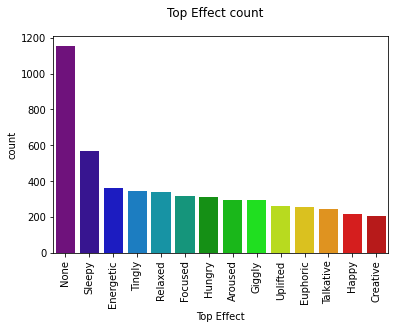

In [8]:
df_raw.rename(columns={'capitalize1':'Top Effect'},inplace=True)
df_raw['Top Effect']=df_raw['Top Effect'].fillna('None')
fig,ax = plt.subplots()
sns.countplot(df_raw['Top Effect'],order=df_raw['Top Effect'].value_counts().index,ax=ax,palette='nipy_spectral')
ax.tick_params(axis='x', rotation=90)
fig.suptitle("Top Effect count")

In [9]:
df_raw['Top Effect']=df_raw['Top Effect'].fillna('None')

Number of synonyms could indicate popularity

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Synonyms Count')

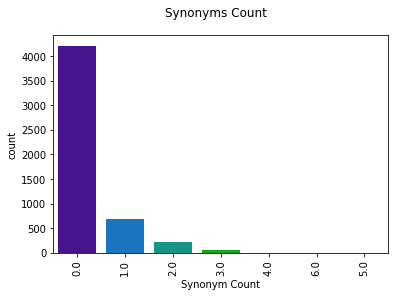

In [10]:
aka = df_raw['textxs1'].str.extract(r"aka (.*)").apply(lambda x: x.str.split(', '))[0]
aka_count = aka[aka.notna()].apply(len).rename('Synonym Count')
df_raw = pd.concat([df_raw,aka_count],axis=1)
df_raw.drop(columns='textxs1',inplace=True)
df_raw['Synonym Count']=df_raw['Synonym Count'].fillna(0)

fig,ax = plt.subplots()
sns.countplot(df_raw['Synonym Count'],order=df_raw['Synonym Count'].value_counts().index,ax=ax,palette='nipy_spectral')
ax.tick_params(axis='x', rotation=90)
fig.suptitle('Synonyms Count')

In [11]:
df_raw.rename(columns={'prxs1':'rating'},inplace=True)
df_raw.rename(columns={'plxs1':'Num Reviews'},inplace=True)

In [12]:
thc=df_raw['mrmd2'].str.extract(r'THC (.*)%').rename(columns={0:'THC (%)'}).astype(float)
cbd_cbg = df_raw['mrm1'].str.extract(r'(\w\w\w) (\d+)%').rename(columns={0:'Other Cannabinoid',1:'Other Level (%)'})
df_raw.drop(columns=['mrmd2','mrm1'],inplace=True)
df_raw=pd.concat([df_raw,thc,cbd_cbg],axis=1)
df_raw['Other Level (%)']=df_raw['Other Level (%)'].astype(float)
df_raw['Other Cannabinoid']=df_raw['Other Cannabinoid'].fillna('None')
df_raw['Other Level (%)']=df_raw['Other Level (%)'].fillna(0)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'Other Level (%) Distribution')

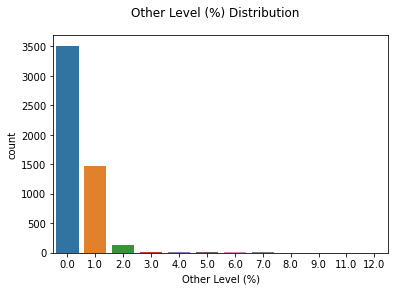

In [13]:
fig,ax=plt.subplots()
sns.countplot(df_raw['Other Level (%)'],ax=ax,palette='tab10')
fig.suptitle("Other Level (%) Distribution")

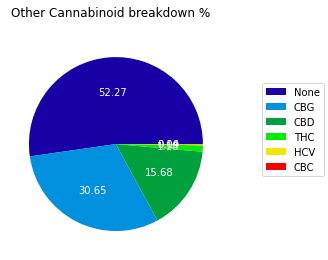

In [14]:
fig,ax=plt.subplots()
patches, texts, autotexts = ax.pie(df_raw['Other Cannabinoid'].value_counts(),autopct='%.2f')
fig.suptitle('Other Cannabinoid breakdown %')
[autotext.set_color('white') for autotext in autotexts]
fig.legend(df_raw['Other Cannabinoid'].value_counts().index,loc='center right')
plt.show()

In [15]:
df_raw['THC (%)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5185 entries, 0 to 5184
Series name: THC (%)
Non-Null Count  Dtype  
--------------  -----  
2483 non-null   float64
dtypes: float64(1)
memory usage: 81.0 KB


Text(0.5, 0.98, 'THC (%) Distribution')

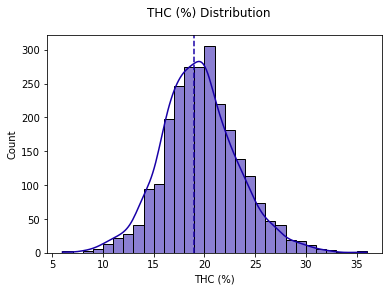

In [16]:
fig,ax=plt.subplots()
sns.histplot(df_raw['THC (%)'],bins=30,kde=True,ax=ax)
ax.axvline(df_raw['THC (%)'].median(),ls='--')
fig.suptitle("THC (%) Distribution")

In [17]:
df_raw['THC (%)']=df_raw['THC (%)'].fillna(df_raw['THC (%)'].median())

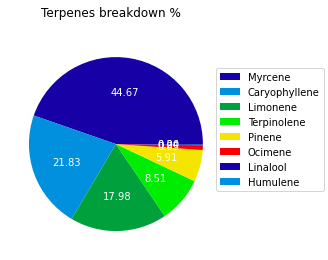

In [18]:
df_raw.rename(columns={'capitaliz1':'Terpenes'},inplace=True)
fig,ax=plt.subplots()
patches, texts, autotexts = ax.pie(df_raw['Terpenes'].value_counts(),autopct='%.2f')
fig.suptitle('Terpenes breakdown %')
[autotext.set_color('white') for autotext in autotexts]
fig.legend(df_raw['Terpenes'].value_counts().index,loc='center right')
plt.show()

In [19]:
df_raw['Terpenes']=df_raw['Terpenes'].fillna('None')

In [20]:
num_reviews = df_raw['Num Reviews'].str.extract('\((\d+\.*\d*)([km])*\)').rename(columns={0:'num',1:'denomination'})
num_reviews['denomination']=num_reviews['denomination'].map({'k':1000,'m':1000000}).fillna(1)
num_reviews['num']= num_reviews['num'].fillna(0).astype(float)
num_reviews['Num Reviews']=num_reviews['num']*num_reviews['denomination']
df_raw.drop(columns='Num Reviews',inplace=True)
df_raw=pd.concat([df_raw,num_reviews['Num Reviews']],axis=1)

In [21]:
df=df_raw.dropna(subset=['rating','THC (%)'])
df

,strain,rating,Top Effect,Terpenes,Name Length,Synonym Count,THC (%),Other Cannabinoid,Other Level (%),Num Reviews
0,Indica,4.6,Sleepy,Caryophyllene,3,0.0,23.0,CBG,1.0,1039.0
1,Hybrid,4.6,Euphoric,Caryophyllene,1,2.0,16.0,CBD,0.0,2219.0
2,Hybrid,4.3,Creative,Myrcene,2,0.0,18.0,CBD,0.0,14300.0
3,Sativa,4.3,Energetic,Caryophyllene,2,2.0,19.0,CBD,0.0,8264.0
4,Hybrid,4.6,Sleepy,Limonene,1,2.0,20.0,CBG,1.0,1073.0
...,...,...,...,...,...,...,...,...,...,...
5180,Hybrid,5.0,None,None,3,0.0,19.0,None,0.0,1.0
5181,Hybrid,5.0,None,None,3,0.0,19.0,None,0.0,1.0
5182,Hybrid,5.0,None,None,3,0.0,19.0,None,0.0,1.0
5183,Hybrid,5.0,None,None,3,0.0,19.0,None,0.0,1.0


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,4503.0,4.475261,0.423757,1.0,4.3,4.5,4.7,5.0
Name Length,4503.0,1.980457,0.617075,1.0,2.0,2.0,2.0,6.0
Synonym Count,4503.0,0.290917,0.648084,0.0,0.0,0.0,0.0,6.0
THC (%),4503.0,19.228914,2.651151,6.0,19.0,19.0,19.0,33.0
Other Level (%),4503.0,0.433267,0.819804,0.0,0.0,0.0,1.0,12.0
Num Reviews,4503.0,77.640462,386.896287,1.0,3.0,11.0,38.0,14300.0


# Section 2 - Multivariate Analysis

## 2.1 - Analysis by strain

Text(0.5, 1.0, 'Distribution of rating by strain')

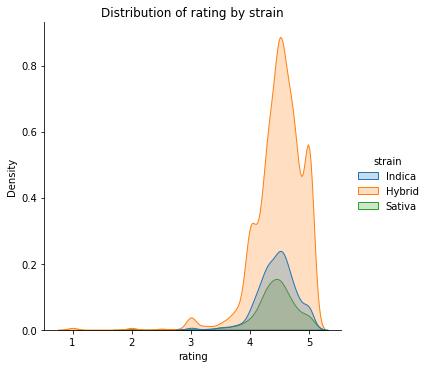

In [23]:
sns.displot(data=df, x='rating', hue='strain', kind='kde', fill=True, palette='tab10')
plt.title('Distribution of rating by strain')

Text(0.5, 0.98, 'Boxplot of rating by strain')

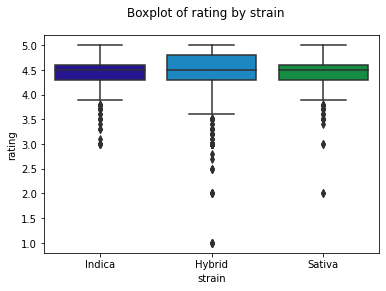

In [24]:
fig,ax=plt.subplots()
sns.boxplot(data=df,x='strain',y='rating',ax=ax)
fig.suptitle('Boxplot of rating by strain')

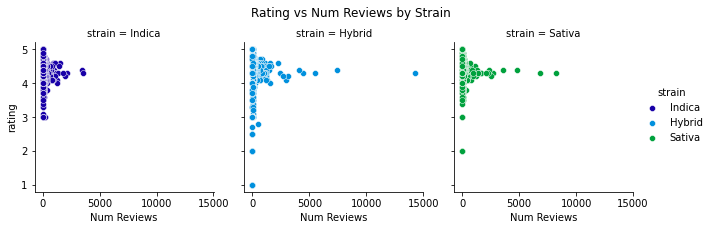

In [25]:
g=sns.FacetGrid(df,col='strain',hue='strain')
g.map(sns.scatterplot,'Num Reviews','rating')
g.figure.suptitle('Rating vs Num Reviews by Strain',y=1.05)
g.add_legend()

Text(0.5, 0.98, 'Boxplot of Other Level (%) by strain')

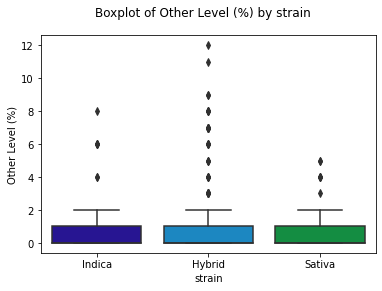

In [26]:
fig,ax=plt.subplots()
sns.boxplot(data=df,x='strain',y='Other Level (%)',ax=ax)
fig.suptitle('Boxplot of Other Level (%) by strain')

Text(0.5, 1.0, 'Distribution of Other Level (%) by strain')

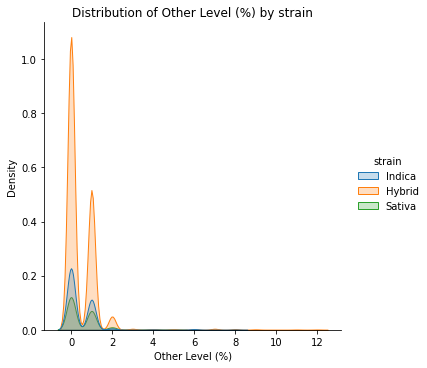

In [27]:
sns.displot(data=df, x='Other Level (%)', hue='strain', kind='kde', fill=True, palette='tab10')
plt.title('Distribution of Other Level (%) by strain')

Text(0.5, 0.98, 'Boxplot of THC (%) by strain')

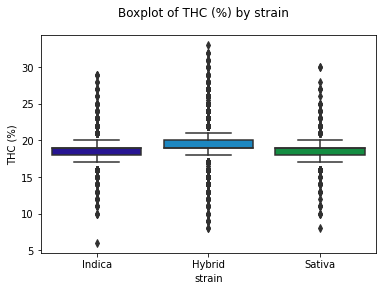

In [28]:
fig,ax=plt.subplots()
sns.boxplot(data=df,x='strain',y='THC (%)',ax=ax)
fig.suptitle('Boxplot of THC (%) by strain')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


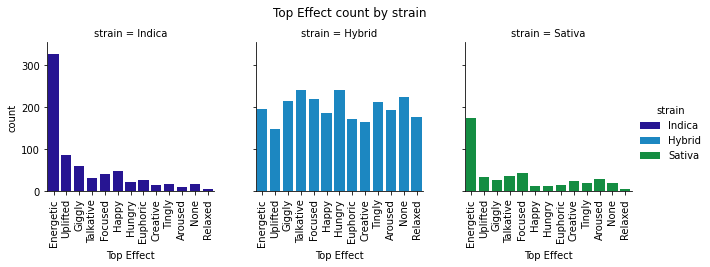

In [29]:
g=sns.FacetGrid(df,col='strain',hue='strain')
g.map(sns.countplot,'Top Effect')
g.figure.suptitle('Top Effect count by strain',y=1.05)
g.set_xticklabels(rotation=90)
g.add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


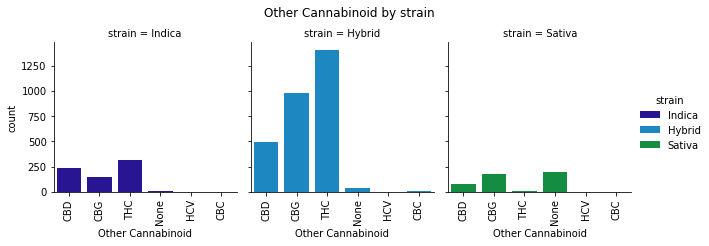

In [30]:
g=sns.FacetGrid(df,col='strain',hue='strain')
g.map(sns.countplot,'Other Cannabinoid')
g.figure.suptitle('Other Cannabinoid by strain',y=1.05)
g.set_xticklabels(rotation=90)
g.add_legend()

## 2.2 - Analysis by Other Cannabinoid

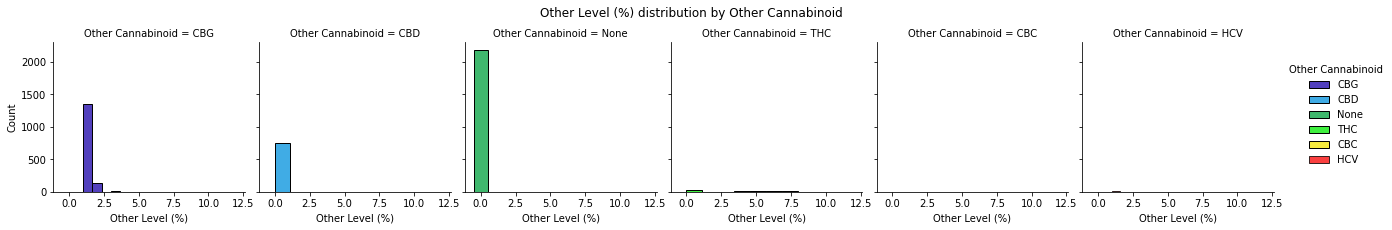

In [31]:
g=sns.FacetGrid(df,col='Other Cannabinoid',hue='Other Cannabinoid')
g.map(sns.histplot,'Other Level (%)')
g.figure.suptitle('Other Level (%) distribution by Other Cannabinoid',y=1.05)
g.add_legend()

Text(0.5, 1.0, 'Distribution of rating by Other Cannabinoid')

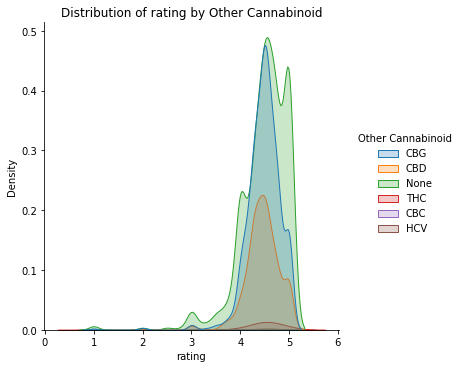

In [32]:
sns.displot(data=df, x='rating', hue='Other Cannabinoid', kind='kde', fill=True, palette='tab10')
plt.title('Distribution of rating by Other Cannabinoid')

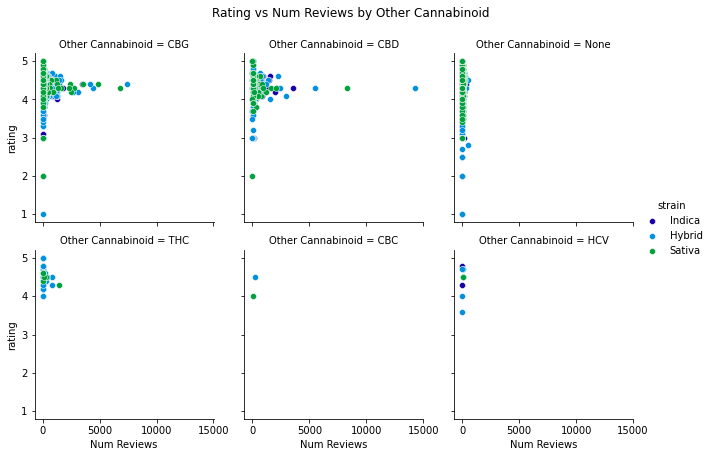

In [33]:
g=sns.FacetGrid(df,col='Other Cannabinoid',hue='strain',col_wrap=3)
g.map(sns.scatterplot,'Num Reviews','rating')
g.figure.suptitle('Rating vs Num Reviews by Other Cannabinoid',y=1.05)
g.add_legend()

Text(0.5, 0.98, 'Boxplot of Other Level (%) by Other Cannabinoid')

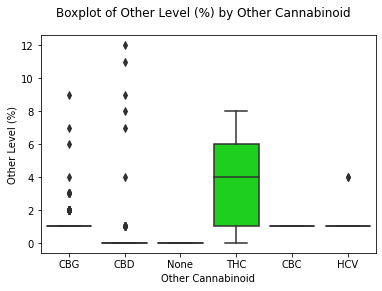

In [34]:
fig,ax=plt.subplots()
sns.boxplot(data=df,x='Other Cannabinoid',y='Other Level (%)',ax=ax)
fig.suptitle('Boxplot of Other Level (%) by Other Cannabinoid')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


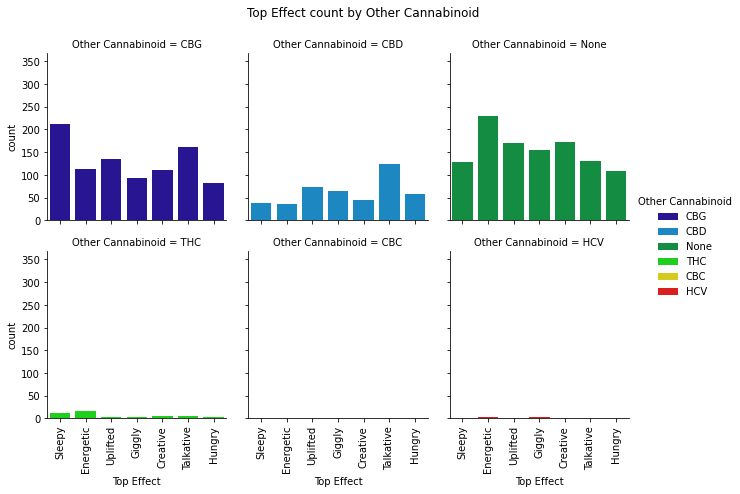

In [35]:
g=sns.FacetGrid(df,col='Other Cannabinoid',hue='Other Cannabinoid',col_wrap=3)
g.map(sns.countplot,'Top Effect')
g.figure.suptitle('Top Effect count by Other Cannabinoid',y=1.05)
g.set_xticklabels(rotation=90)
g.add_legend()

## 2.3 - Analysis by Terpenes

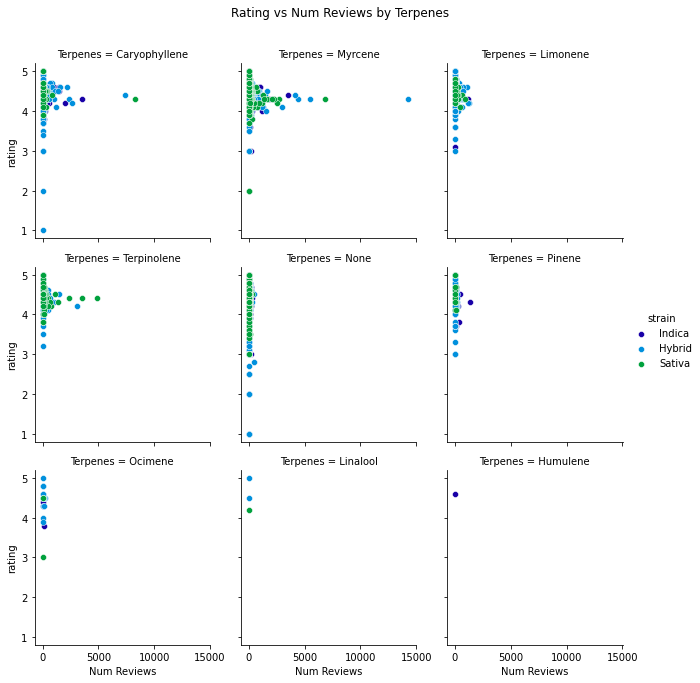

In [36]:
g=sns.FacetGrid(df,col='Terpenes',hue='strain',col_wrap=3)
g.map(sns.scatterplot,'Num Reviews','rating')
g.figure.suptitle('Rating vs Num Reviews by Terpenes',y=1.05)
g.add_legend()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of rating by Terpenes')

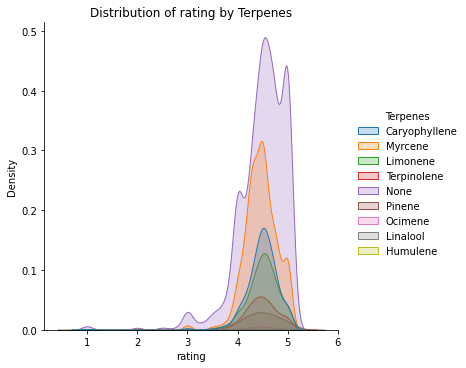

In [37]:
sns.displot(data=df, x='rating', hue='Terpenes', kind='kde', fill=True, palette='tab10')
plt.title('Distribution of rating by Terpenes')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Distribution of THC (%) by Terpenes')

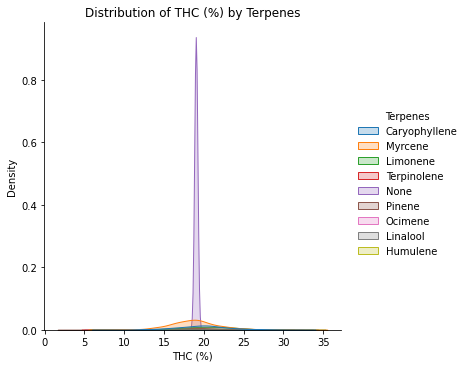

In [38]:
sns.displot(data=df, x='THC (%)', hue='Terpenes', kind='kde', fill=True, palette='tab10')
plt.title('Distribution of THC (%) by Terpenes')

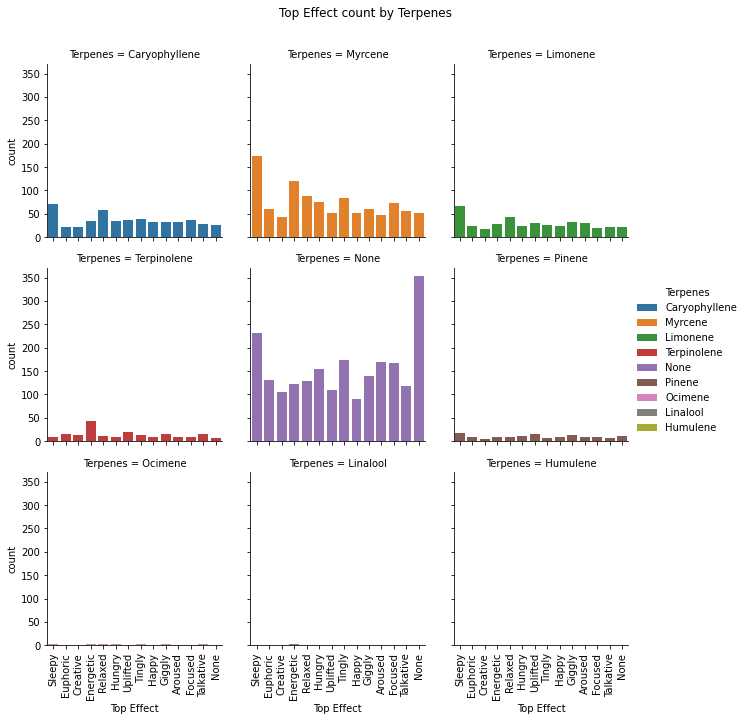

In [39]:
g=sns.FacetGrid(df,col='Terpenes',hue='Terpenes',col_wrap=3,palette='tab10')
g.map(sns.countplot,'Top Effect',order=pd.unique(df['Top Effect']))
g.figure.suptitle('Top Effect count by Terpenes',y=1.05)
g.set_xticklabels(rotation=90)
g.add_legend()

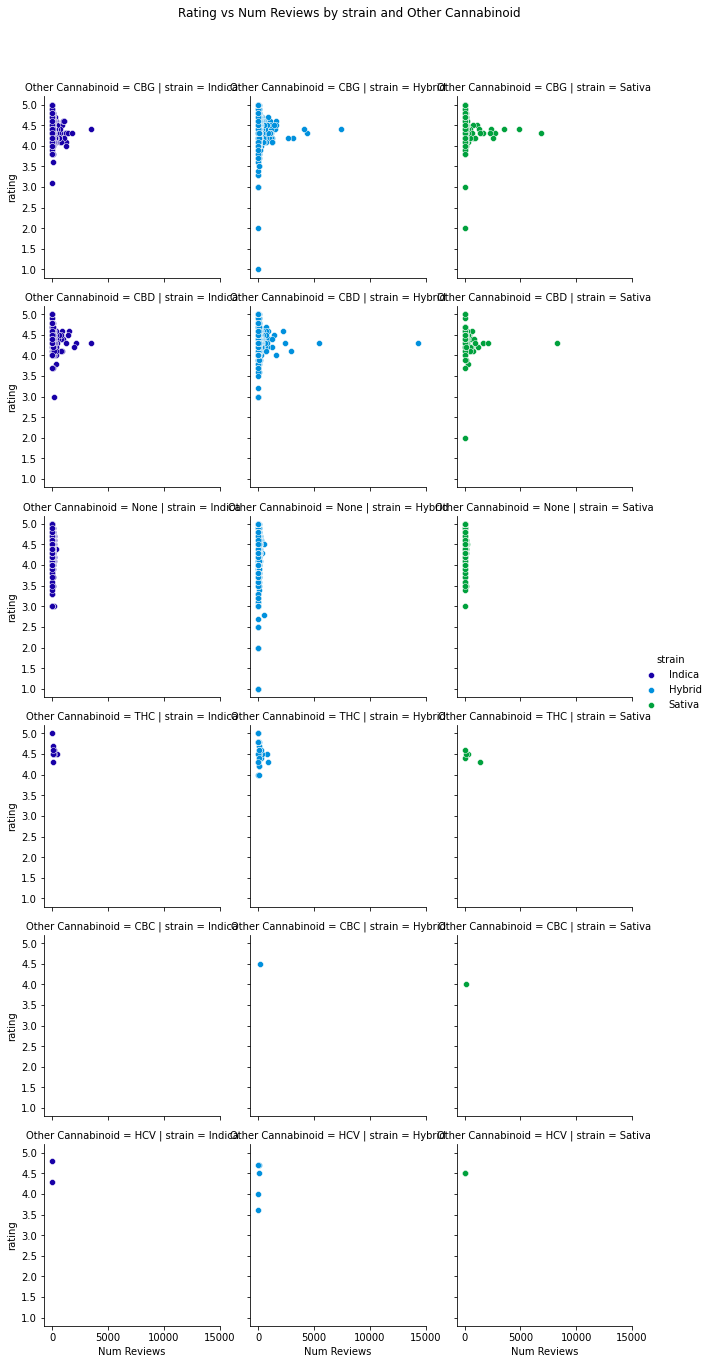

In [40]:
g=sns.FacetGrid(df,col='strain',row='Other Cannabinoid',hue='strain')
g.map(sns.scatterplot,'Num Reviews','rating')
g.figure.suptitle('Rating vs Num Reviews by strain and Other Cannabinoid',y=1.05)
g.add_legend()

# Section 3 - Feature Engineering

In [41]:
categorical_columns=['strain','Top Effect','Terpenes','Other Cannabinoid']
categorical = pd.get_dummies(df[categorical_columns])
df.drop(columns=categorical_columns,inplace=True)
categorical

<ipython-input-41-f0996b6aef1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=categorical_columns,inplace=True)


,strain_Hybrid,strain_Indica,strain_Sativa,Top Effect_Aroused,Top Effect_Creative,Top Effect_Energetic,Top Effect_Euphoric,Top Effect_Focused,Top Effect_Giggly,Top Effect_Happy,...,Terpenes_None,Terpenes_Ocimene,Terpenes_Pinene,Terpenes_Terpinolene,Other Cannabinoid_CBC,Other Cannabinoid_CBD,Other Cannabinoid_CBG,Other Cannabinoid_HCV,Other Cannabinoid_None,Other Cannabinoid_THC
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5180,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5181,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5182,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5183,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [42]:
# scale_columns=['rating','THC (%)','Num Reviews']
# scale_data = df[scale_columns]
# df.drop(columns=scale_columns,inplace=True)
# scaler = StandardScaler()
# scaler.fit(scale_data)
